Импортируем все необходимые элементы

In [93]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

seed = 24

Подключаем файл + выводим первые строки на проверку

In [94]:
df = pd.read_csv('churn_test.csv')
df.head()

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
1,1,57,0,2,2,1,4,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
2,1,45,0,2,2,1,5,0,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
3,0,62,0,0,2,1,4,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
4,1,47,0,4,6,2,4,0,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626


Задаем X | Y / дропаем основную переменную и присваиваем ее к Y

In [95]:
X = df.drop(columns='churn')
Y = df.churn

Смотрим что подключилось к X

In [96]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
1,57,0,2,2,1,4,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
2,45,0,2,2,1,5,0,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
3,62,0,0,2,1,4,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
4,47,0,4,6,2,4,0,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,46,1,3,2,1,2,0,34,1,2,4,4930.0,159,4771.0,0.592,7412,60,0.579,0.032
6459,48,1,4,0,1,3,0,44,2,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152
6460,49,0,4,5,1,1,0,36,5,2,3,4167.0,0,4167.0,0.581,7590,87,0.776,0.000
6461,52,0,5,6,1,4,0,36,4,3,3,9611.0,0,9611.0,0.840,7636,64,0.829,0.000


Смотрим что подключилось к Y

In [97]:
Y

0       1
1       1
2       1
3       0
4       1
       ..
6458    0
6459    0
6460    0
6461    0
6462    0
Name: churn, Length: 6463, dtype: int64

Разделяем наши данные на тренировочную и тестовую часть, с объемом в 20% на тест, соответственно 80% на тренировку

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

print(f"Train : {X_train.shape} {Y_train.shape}")
print(f"Test : {X_test.shape} {Y_test.shape}")

Train : (5170, 19) (5170,)
Test : (1293, 19) (1293,)


In [99]:
# target_column = "churn"
# np.random.seed(seed)

# continuous_columns = [key for key in df.keys() if df[key].dtype in ("int64", "float64")]
# categorical_columns = [key for key in df.keys() if df[key].dtype == "object"]


# #categorical_columns.remove(target_column)

# print(f"Continuous : {len(continuous_columns)}, Categorical : {len(categorical_columns)}")

Далее импортируем модель градиентного бустинга

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

применяем фит метод для того чтобы модель могла использовать данные

In [101]:
model.fit(X_train, Y_train)

GradientBoostingClassifier()

Делаем вывод по использованию

In [102]:
from sklearn.metrics import classification_report

Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       241
           1       0.97      0.99      0.98      1052

    accuracy                           0.96      1293
   macro avg       0.95      0.92      0.94      1293
weighted avg       0.96      0.96      0.96      1293



<Axes: >

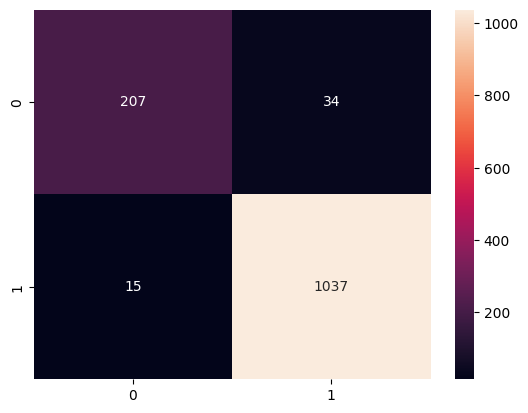

In [103]:
from sklearn.metrics import confusion_matrix 
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True, fmt='d')

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       241
           1       0.96      0.98      0.97      1052

    accuracy                           0.95      1293
   macro avg       0.94      0.90      0.92      1293
weighted avg       0.95      0.95      0.95      1293



<Axes: >

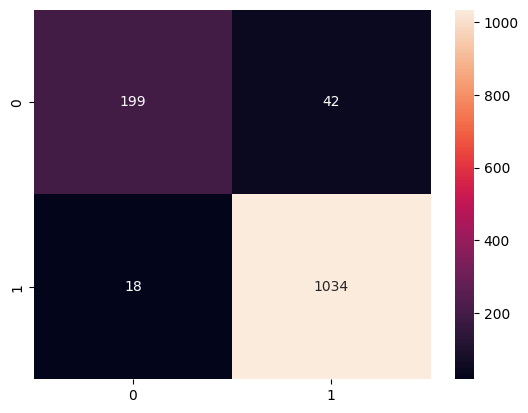

In [105]:
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True, fmt='d')

In [106]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

model = HistGradientBoostingClassifier()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       241
           1       0.97      0.98      0.98      1052

    accuracy                           0.96      1293
   macro avg       0.95      0.93      0.94      1293
weighted avg       0.96      0.96      0.96      1293



<Axes: >

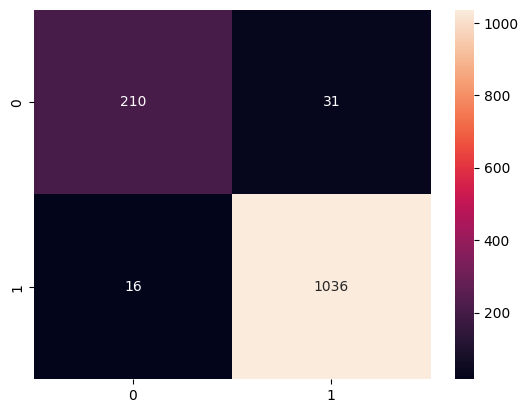

In [110]:
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True, fmt='d')

In [ ]:
from sklearn.ensemble import XGBClassifier

model = XGBClassifier()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject